In [1]:
import os
from tqdm.auto import tqdm
%load_ext autoreload
%autoreload 2
from helpers import get_df_from_logdir
import pandas as pd
import plotly.express as px
import numpy as np

pd.set_option('display.max_columns', None)

In [51]:
config_name = 've5_nonlinear_server_collect_ve5_rec_nonlin_gnn_gumbel_siamese_l2_search_opt_fit_ve5_dec_rec'
path = f"/home/sergei/ray_results/{config_name}/"
trials = os.listdir(path)
trials = [os.path.join(path, trial) for trial in trials]
trials = sorted(filter(os.path.isdir, trials))
print(f"Got {len(trials)} trials")

Got 13 trials


# Reading trial data

In [52]:
def get_last_epoch(trial):
    """Get last row with epoch data."""
    try:
        df = get_df_from_logdir(trial, do_tqdm=False)
    except FileNotFoundError:
        return None
    if hasattr(df, 'epochs'):
        df = df[df.epochs==max(df.epochs)]
        return df.iloc[0]
    return None

df = [get_last_epoch(trial) for trial in tqdm(trials)]
df = pd.DataFrame([x for x in df if x is not None])
df.to_csv(f'{config_name}.csv', index=False)

In [53]:
df = pd.read_csv(f'{config_name}.csv')
df

,epochs,n_samples,losses/opt1/non_sparse_fit/coeff,losses/opt1/non_sparse_fit/value,losses/opt1/value,grads/opt1/grad_total_l1mean,grads/opt1/grad_total_l2sum,metrics/batch_index,metrics/batch_size,metrics/mean_feature,metrics/std_feature,metrics/min_feature,metrics/max_feature,metrics/std_feature_avg,metrics/inv_std_feature_avg,metrics/episode_reward,metrics/non_sparse_fit_loss_smooth,weights/model/bn.weight,weights/model/bn.bias,weights/model/model.switch.probas,weights/model/model.model.fc01.weight,weights/model/model.model.fc01.bias,weights/model/model.model.fc02.weight,weights/model/model.model.fc02.bias,weights/model/model.model.fc03.weight,weights/model/model.model.fc03.bias,weights/model/model.model.fc04.weight,weights/model/model.model.fc04.bias,weights/decoder/model.fc01.weight,weights/decoder/model.fc01.bias,weights/decoder/model.fc02.weight,weights/decoder/model.fc02.bias,weights/decoder/model.fc03.weight,weights/decoder/model.fc03.bias,weights/decoder/model.fc04.weight,weights/decoder/model.fc04.bias,weights/non_sparse_model/bn.weight,weights/non_sparse_model/bn.bias,weights/non_sparse_model/model.switch.probas,weights/non_sparse_model/model.model.fc01.weight,weights/non_sparse_model/model.model.fc01.bias,weights/non_sparse_model/model.model.fc02.weight,weights/non_sparse_model/model.model.fc02.bias,weights/non_sparse_model/model.model.fc03.weight,weights/non_sparse_model/model.model.fc03.bias,weights/non_sparse_model/model.model.fc04.weight,weights/non_sparse_model/model.model.fc04.bias,CausalModel,model,checkpoint_tune,checkpoint_size,time_this_iter_s,should_checkpoint,done,timesteps_total,episodes_total,training_iteration,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,config/name,config/base_dir,config/db_name,config/sources,config/log_sys_usage,config/_gin__lr__loguniform,config/_gin__b1__choice,config/_gin__b2__choice,config/_gin__iters__choice,config/_gin__ratio__choice,time_since_restore,timesteps_since_restore,iterations_since_restore,perf/cpu_util_percent,perf/ram_util_percent,perf/gpu_util_percent0,perf/vram_util_percent0,perf/gpu_util_percent1,perf/vram_util_percent1,trial_id,experiment_tag,metrics/context_stats_steps_collected_laps,metrics/context_stats_collect_iters,metrics/context_stats_collect_time_s,metrics/context_stats_steps_collected_now,metrics/context_stats_pending_refs,metrics/context_stats_steps_collected,metrics/context_stats_steps_sampled_laps,metrics/context_stats_collected_sampled_ratio,metrics/context_stats_steps_sampled
0,9995.0,5000.0,1.0,2.719654e-02,2.719654e-02,1.104431e-03,0.343989,0.0,-1.0,[-0.38246453 -0.3066829 -0.2803993 -0.104514...,[0.24509187 0.23279841 0.23239765 0.43675265 0...,-1.328440,7.072510,0.0,0.0,26.514868,2.845866e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.368529,NaN,False,NaN,NaN,9996,e5778596d46241fb901c83add229e62a,2021-02-09_02-10-36,1612833036,7949.261113,22014,iccluster031,10.90.38.7,ve5_nonlinear_server_collect_ve5_rec_nonlin_gn...,/home/sergei/causality-disentanglement/results...,causal_sparse,['/home/sergei/causality-disentanglement/vecto...,True,0.000039,0.9999,0.9990,2,0.5,7949.261113,0,9996,94.2,16.1,0.07,0.212168,0.74,0.386259,1988d_00000,"0__gin__b1__choice=0.9999,_gin__b2__choice=0.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9995.0,5000.0,1.0,1.743460e-03,1.743460e-03,1.110600e-03,1.227077,0.0,-1.0,[-0.03300226 -0.034279 -0.08570011 0.022254...,[0.03315744 0.03653011 0.0573825 0.04038429 0...,-1.314550,7.147260,0.0,0.0,26.073200,3.009966e-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.588265,NaN,False,NaN,NaN,9996,5db9be65ecfc41fdbf30daf639c7ebfe,2021-02-09_03-06-28,1612836388,11301.128510,22017,iccluster031,10.90.38.7,ve5_nonlinear_server_collect_ve5_rec_nonlin_gn...,/home/sergei/causality-disentanglement/results...,causal_sparse,['/home/serg

In [54]:
del df['losses/opt1/value']
del df['metrics/mean_feature']
del df['metrics/std_feature']
del df['metrics/min_feature']
del df['metrics/max_feature']
del df['metrics/episode_reward']
del df['metrics/non_sparse_fit_loss_smooth']
del df['metrics/context_stats_steps_collected_laps']
del df['metrics/context_stats_collect_iters']
del df['metrics/context_stats_collect_time_s']
del df['metrics/context_stats_steps_collected_now']
del df['metrics/context_stats_pending_refs']
del df['metrics/context_stats_steps_collected']
del df['metrics/context_stats_steps_sampled_laps']
del df['metrics/context_stats_collected_sampled_ratio']
del df['metrics/context_stats_steps_sampled']

In [55]:
all_fields = [c for c in df.columns if any([c.startswith(t) for t in ['losses', 'metrics', 'config']])]
all_fields = [f for f in all_fields if len(set(df[f])) > 1]
all_fields.append('time_total_s')
# all_fields.remove('config/base_dir')
all_fields

['losses/opt1/non_sparse_fit/value',
 'config/_gin__lr__loguniform',
 'config/_gin__b1__choice',
 'config/_gin__b2__choice',
 'config/_gin__iters__choice',
 'config/_gin__ratio__choice',
 'time_total_s']

In [56]:
def removeprefix(text, prefix):
    if text.startswith(prefix):
        return text[len(prefix):]
    return text  # or whatever


def shorten(x):
    x = removeprefix(x, 'losses/opt1/')
    x = removeprefix(x, 'config/_gin__')
    x = removeprefix(x, 'metrics/')
    return x
labels = {x: shorten(x) for x in all_fields}

In [57]:
for c in df.columns:
    if c.endswith('loguniform') or 'gin__b1' in c or 'gin__b2' in c:
        df[c] = np.log10(df[c])

In [58]:
df['losses/opt1/non_sparse_fit/value'] = np.log10(df['losses/opt1/non_sparse_fit/value'])

In [59]:
df['time_total_s'] /= 3600

In [60]:
df[all_fields]

,losses/opt1/non_sparse_fit/value,config/_gin__lr__loguniform,config/_gin__b1__choice,config/_gin__b2__choice,config/_gin__iters__choice,config/_gin__ratio__choice,time_total_s
0,-1.565486,-4.404963,-0.000043,-0.000435,2,0.5,2.208128
1,-2.758588,-4.960118,-0.096910,-0.301030,3,0.7,3.139202
2,-0.613623,-1.064195,-0.301030,-0.301030,1,0.5,2.198379
3,-3.574869,-2.546533,-0.301030,-0.045757,5,0.7,3.108525
4,-2.415513,-4.582423,-0.004365,-0.004365,3,0.1,1.267032
5,-3.702142,-3.007373,-0.045757,-0.045757,4,0.5,2.172115
6,-2.141451,-3.149497,-0.000043,-0.000435,1,0.5,1.881928
7,30.860665,-3.009133,-0.004365,-0.301030,2,0.5,0.046003
8,-2.897331,-3.759721,-0.045757,-0.004365,3,0.5,0.949524
9,-0.697571,-2.198904,-0.096910,-0.000043,4,0.5,0.938417


In [61]:
df = df[df['losses/opt1/non_sparse_fit/value'] <= 0]

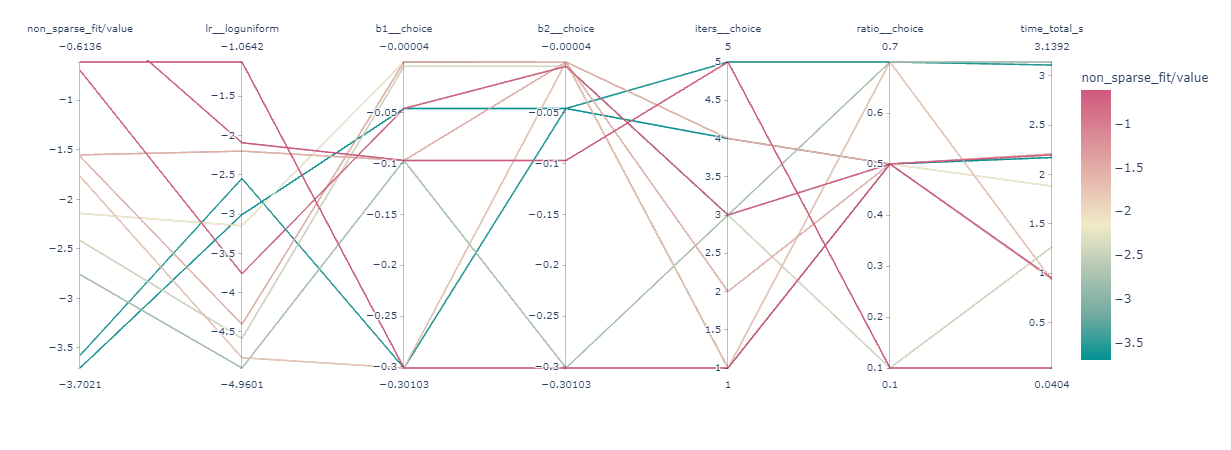

In [62]:
fig = px.parallel_coordinates(df[all_fields], color="losses/opt1/non_sparse_fit/value",
                              labels=labels,
                             color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()